# Analyizing the NEON Mosquito Data

This notebook assumes you have downloaded the NEON Mosquito data, "Mosquitoes sampled from CO2 Traps", for some sites.
We assume you downloaded data for two sites, ABBY and UNDE, for the years 2023–2024, since that is what the [README](./README.md#NEON) does.
Of course, this code should work for any number of sites and years.

If you haven't already, unzip the data in the week 6 directory.
You will see folder with many nested folders, and inside each of those are many files.
We will focus on the "mos_expertTaxonomistIDProcessed" files, for which there is one for each site for each month.

Our first task is to get all the data loaded.

In [1]:
import pandas as pd
import glob
import datetime
import matplotlib as mp

Our approach to load the data is to first identify all of the relevant CSV files, then load each into its own data frame, and then concatenate the dataframes together.
The glob package will find files based on a pattern.

In [2]:
filenames = glob.glob("NEON_count*/**/*Processed*", recursive=True)
dfs = [pd.read_csv(fname) for fname in filenames]
df = pd.concat(dfs)
print(f"Found {len(dfs)} CSV files")

Found 21 CSV files


We will sort the observations based on the date the samples were collected. To this end we need to make that column a datetime datatype.

In [3]:
df['collectDate'] = pd.to_datetime(df['collectDate'])

And then finally, we only care about the month summary for the data, so make a new column that will let us group on the year/month combination.

In [4]:
df['yearmonth'] = df['collectDate'].values.astype('<M8[M]')

In [5]:
df.set_index('yearmonth', inplace=True)

Each site is indicated by the `siteID` column. This lets us recover the directory structure of the original CSV files.

In [7]:
sites = df.groupby('siteID')

In [8]:
sites['uid'].count()

siteID
ABBY     119
UNDE    2984
Name: uid, dtype: int64

Group all the observations by month/year and then by site id. At this point we are not making distinctions between mosquito species. That is certainly possible, however. (note to future self: probably the best approach is to make a column for each species we care about and then we can aggregate the counts into that column.)

In [12]:
s = df.groupby(['yearmonth','siteID'])['uid'].count().unstack(level=1)

<Axes: xlabel='yearmonth'>

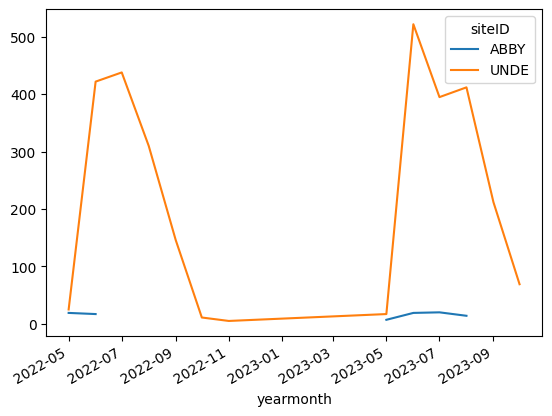

In [13]:
s.plot()

There looks to be something up with the ABBY data since it is missing July and August 2022 counts.